In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
from keras.utils.vis_utils import plot_model
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist =  keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


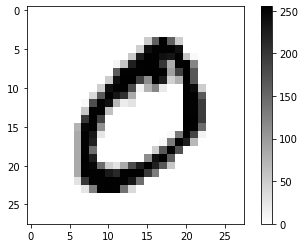

In [4]:
plt.figure()
plt.imshow(train_images[1], cmap='binary')
plt.colorbar()

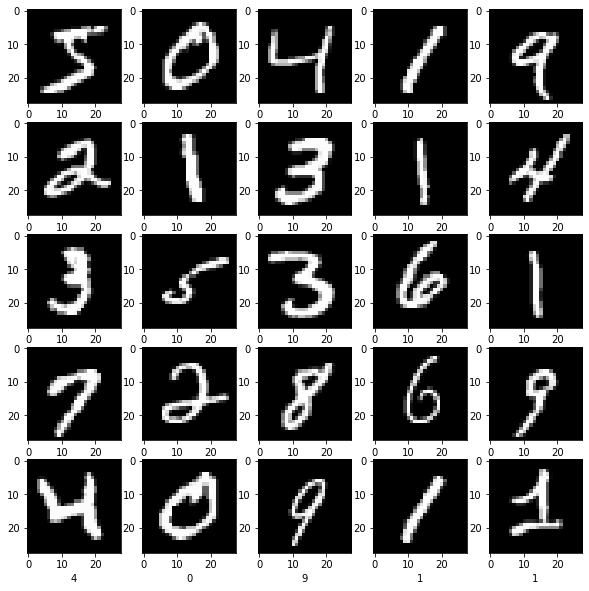

In [5]:
train_images = train_images / 255
test_images = test_images / 255

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(train_images[i], cmap='gray')
  plt.xlabel(train_labels[i])

In [6]:
# Inicialização do modelo de Convnets para
# reconhecimento de digitos do dataset MNIST
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(128, activation=tf.nn.relu),
  keras.layers.Dense(10, activation=tf.nn.softmax)
])

#sgd = SGD(learning_rate=0.05, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2578 - accuracy: 0.9260
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1102 - accuracy: 0.9675
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0769 - accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0571 - accuracy: 0.9826
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0448 - accuracy: 0.9863


313/313 [==============================] - 1s 2ms/step - loss: 0.0751 - accuracy: 0.9773
0.07505790144205093 0.9772999882698059


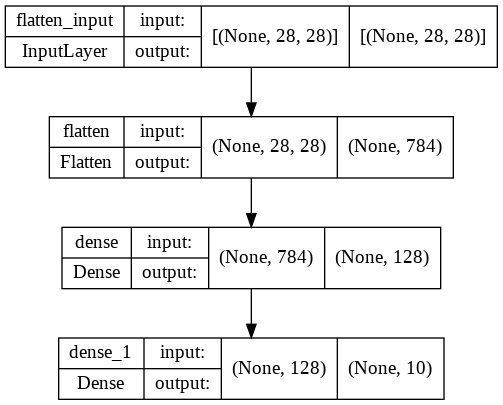

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss, test_acc)
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [12]:
model2 = keras.Sequential()

model2.add(keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu', input_shape=(28,28,1)))

model2.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model2.add(keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation='relu', input_shape=(28,28,1)))

model2.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(1024, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)             

In [14]:
train_images = train_images.reshape(train_images.shape[0], 
                                    train_images.shape[1], 
                                    train_images.shape[2], 
                                    1)

model2.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 185s 99ms/step - loss: 0.0643 - accuracy: 0.9804
Epoch 2/5
1875/1875 [==============================] - 199s 106ms/step - loss: 0.0337 - accuracy: 0.9895
Epoch 3/5
1875/1875 [==============================] - 182s 97ms/step - loss: 0.0224 - accuracy: 0.9925
Epoch 4/5
1875/1875 [==============================] - 182s 97ms/step - loss: 0.0155 - accuracy: 0.9949
Epoch 5/5
1875/1875 [==============================] - 182s 97ms/step - loss: 0.0146 - accuracy: 0.9953


In [16]:
test_images = (np.expand_dims(test_images, 3))
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0751 - accuracy: 0.9773
0.07505790144205093
0.9772999882698059
